In [24]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [6]:
os.chdir("D:/Imarticus/Time Series And Deep Learning")
df=pd.read_csv("D:/Imarticus/Time Series And Deep Learning/monthly_milk_production.csv",index_col='Date',parse_dates=True)

In [7]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [8]:
df.isnull().sum()

Production    0
dtype: int64

In [9]:
df.shape

(168, 1)

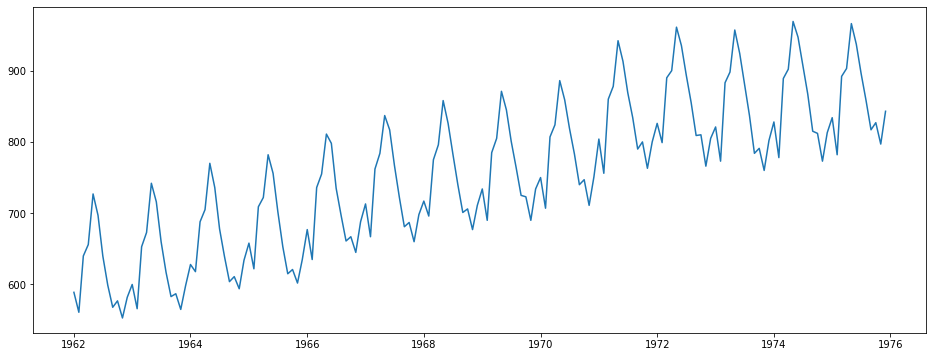

In [11]:
plt.figure(figsize=(16,6))
plt.plot(df.Production)

### We need to stationarize the data now as can clearly seen that variance is same but mean is changing.

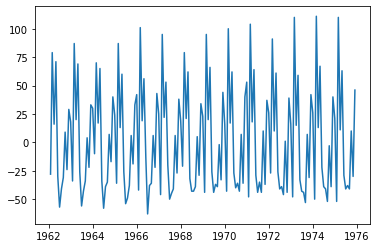

In [12]:
plt.plot(df.diff()) 

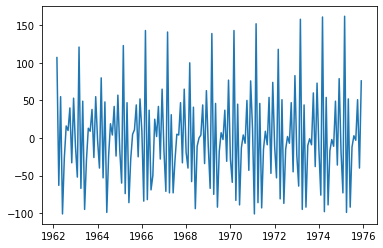

In [13]:
plt.plot(df.diff().diff()) 

In [14]:
#df_log=np.log(df)

In [16]:
#plt.plot(df_log)

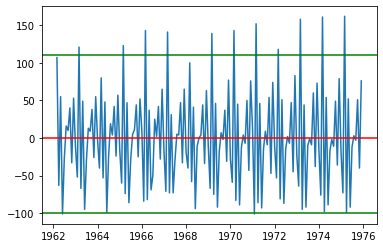

In [22]:
plt.plot(df.diff().diff())
plt.axhline(y=0 ,color='r')
plt.axhline(y=110 ,color='g')
plt.axhline(y=-100 ,color='g')

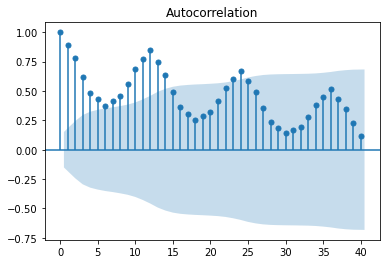

In [25]:
plot_acf(df.Production,lags=40);

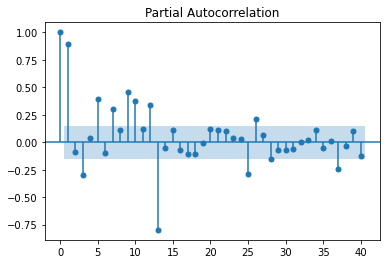

In [26]:
plot_pacf(df.Production,lags=40);

### We can clearly see the decay out after 2 differencing diff() here from the above graph we can finalize the p values as 2 and we already took I as = 2 

In [27]:
model =ARIMA(df,order=(2,2,0))
result=model.fit();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [28]:
result.params # Params is parameter

const                 -0.008892
ar.L1.D2.Production   -0.696925
ar.L2.D2.Production   -0.116911
dtype: float64

In [30]:
fore_values= result.forecast(steps=12)

In [31]:
fore_values[0] # To get the forecasted 1st array 

array([ 840.69398625,  863.15230108,  873.98309869,  890.00605999,
        903.75372604,  918.46395444,  932.7532274 ,  947.20721275,
        961.579492  ,  975.97332951,  990.34556674, 1004.71420923])

In [32]:
forecast_values = result.forecast(steps = 12)

In [34]:
forecast_values_df = pd.DataFrame(forecast_values[0])
forecast_values_df

,0
0,840.693986
1,863.152301
2,873.983099
3,890.006060
4,903.753726
5,918.463954
6,932.753227
7,947.207213
8,961.579492
9,975.973330


In [35]:
forecast_values_df.rename(columns= {forecast_values_df.columns[0] : 'Predicted'} , inplace = True)
forecast_values_df

,Predicted
0,840.693986
1,863.152301
2,873.983099
3,890.006060
4,903.753726
5,918.463954
6,932.753227
7,947.207213
8,961.579492
9,975.973330


In [36]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


In [37]:
date_for_pred = ['1976-01-01'  , '1976-02-01' ,
                 '1976-03-01', '1976-04-01','1976-05-01', 
                 '1976-06-01', '1976-07-01','1976-08-01',
                 '1976-09-01', '1976-10-01','1976-11-01',
                 '1976-12-01']

In [38]:
forecast_values_df  = pd.concat([forecast_values_df , pd.Series(date_for_pred )] , axis = 1)

In [39]:
forecast_values_df.rename(columns= {forecast_values_df.columns[1] : 'Month'} , inplace = True) 

In [40]:
forecast_values_df.Month  = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True ) 

In [41]:
forecast_values_df.head()

,Predicted,Month
0,840.693986,1976-01-01
1,863.152301,1976-02-01
2,873.983099,1976-03-01
3,890.006060,1976-04-01
4,903.753726,1976-05-01


In [42]:
pred_airpas = forecast_values_df.set_index(['Month'])
pred_airpas.head()

,Predicted
Month,
1976-01-01,840.693986
1976-02-01,863.152301
1976-03-01,873.983099
1976-04-01,890.006060
1976-05-01,903.753726


<AxesSubplot:xlabel='Month'>

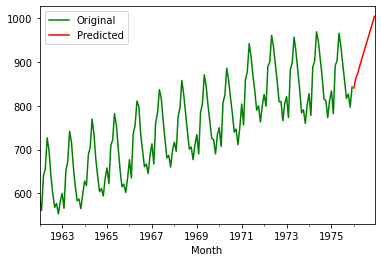

In [43]:
df['Production'].plot(legend = True , label = "Original" , color ="green")  # original
pred_airpas['Predicted'].plot(legend = True , label = "Predicted" , color ="red") # predicted 

### Train & Test

In [45]:
df.shape

(168, 1)

In [48]:
train=df.iloc[0:148]  # 1st 148 in train
test=df.iloc[148:168]  # Last few records in test

<AxesSubplot:xlabel='Date'>

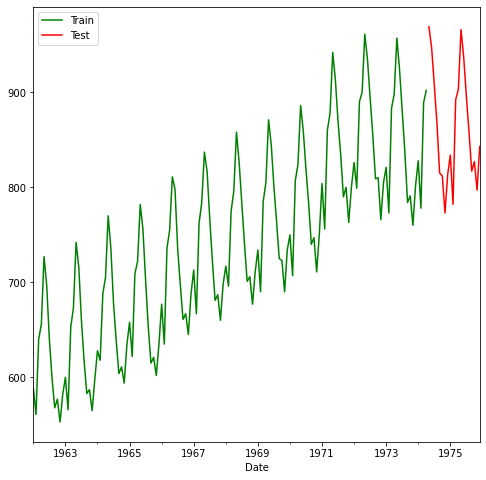

In [49]:
plt.figure(figsize =(8 , 8))
train['Production'].plot(legend = True , label = "Train" , color ="green")
test['Production'].plot(legend = True , label = "Test" , color ="red")

In [119]:
auto_arima(df['Production'], seasonal= True ,m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [120]:
model_sarima=SARIMAX(df['Production'],order=(2,0,0),seasonal_order=(0, 1, 1, 12))
results= model_sarima.fit() # Model has been Created.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [121]:
pred_rv=results.predict(start=148,end=167)
pred_rv

1974-05-01    963.134902
1974-06-01    938.168555
1974-07-01    901.935572
1974-08-01    866.389181
1974-09-01    819.706847
1974-10-01    821.165167
1974-11-01    778.580766
1974-12-01    813.644385
1975-01-01    838.109282
1975-02-01    790.347176
1975-03-01    888.306567
1975-04-01    904.958905
1975-05-01    966.831119
1975-06-01    939.484007
1975-07-01    895.907283
1975-08-01    855.164701
1975-09-01    808.298628
1975-10-01    817.173927
1975-11-01    788.422468
1975-12-01    835.204921
Freq: MS, Name: predicted_mean, dtype: float64

In [122]:
len(pred_rv)

20

In [123]:
test.shape

(20, 1)

Note :- Predicted and test length shouls be same.

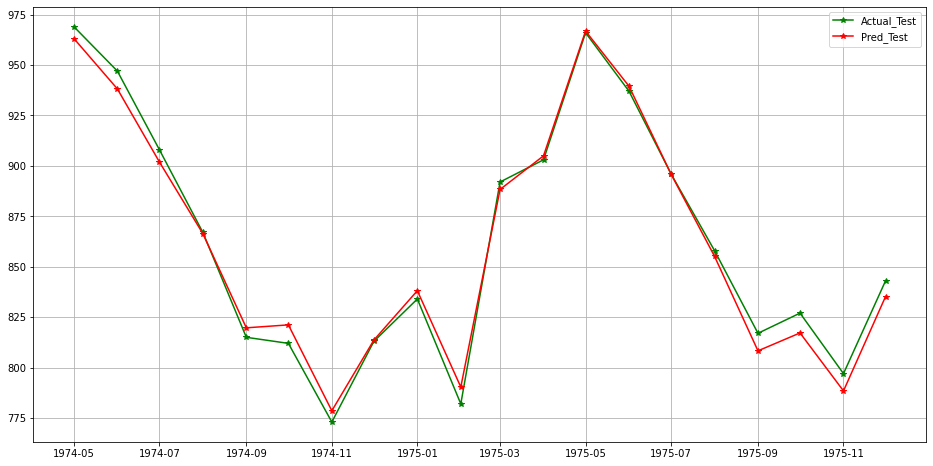

In [124]:
plt.figure(figsize=(16,8))
plt.plot(test.Production,marker="*",color="g",label="Actual_Test")
plt.plot(pred_rv,color="r",label="Pred_Test",marker="*")
plt.legend()
plt.grid()

### Now we will see the Error terms 

In [125]:
error=test.Production-pred_rv
error

Date
1974-05-01    5.865098
1974-06-01    8.831445
1974-07-01    6.064428
1974-08-01    0.610819
1974-09-01   -4.706847
1974-10-01   -9.165167
1974-11-01   -5.580766
1974-12-01   -0.644385
1975-01-01   -4.109282
1975-02-01   -8.347176
1975-03-01    3.693433
1975-04-01   -1.958905
1975-05-01   -0.831119
1975-06-01   -2.484007
1975-07-01    0.092717
1975-08-01    2.835299
1975-09-01    8.701372
1975-10-01    9.826073
1975-11-01    8.577532
1975-12-01    7.795079
dtype: float64

In [126]:
MSE = np.mean(np.square(error))
MSE

35.64054078334709

In [129]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
mse=mean_squared_error(test.Production,pred_rv)
rmse=sqrt(mse)

In [130]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)

Mean_Squared_Error: 35.64054078334709
Root_Mean_Sqaured_Erro: 5.969969914777384
